In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import cm, colors


In [5]:
# Load dataset
with open('names.txt') as f:
    words = f.readlines()
words = list(map(str.strip, words))
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [6]:
# Get mapping between characters and numbers
chars = sorted(list(set(''.join(words) + '.')))
stoi = dict(list(zip(chars, range(len(chars)))))
itos = {v:k for k,v in stoi.items()}
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [7]:
bigram_counts = torch.zeros(27, 27, dtype=torch.int32)

for word in words:
    word = '.' + word + '.'
    for c1, c2 in zip(word, word[1:]):
        bigram_counts[stoi[c1], stoi[c2]] += 1

# Get probability distribution
P_bigram = bigram_counts / bigram_counts.sum(1, keepdims=True)
P_bigram

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [8]:
# Make generation deterministic
generator = torch.Generator().manual_seed(1337)

# Generate names from bigram distribution
for _ in range(10):
    name = ''
    s = 0
    while True:
        s = torch.multinomial(P_bigram[s], num_samples=1, replacement=True, generator=generator).item()
        name += itos[s]
        if s == 0:
            break
    print(name)


myliena.
r.
a.
ahi.
grammian.
n.
xxonh.
chaldeiniy.
bler.
jaranige.


In [9]:
log_likelihood = 0
N = 0

for word in words[:3]:
    word = '.' + word + '.'
    for c1, c2 in zip(word, word[1:]):
        prob = P_bigram[stoi[c1], stoi[c2]]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        N += 1
        
log_likelihood / -N

tensor(2.4241)

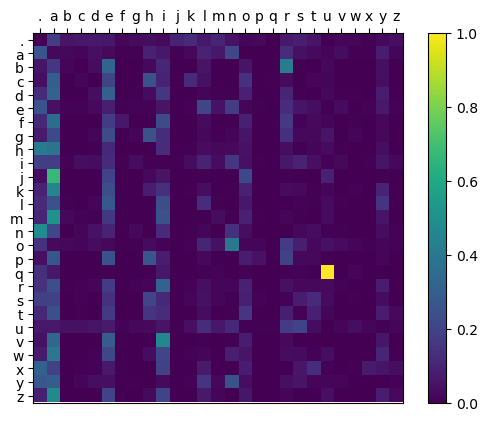

In [10]:
fig, ax = plt.subplots()

plt.imshow(P_bigram)

ax.xaxis.tick_top()
ax.set_xticks(range(len(itos)))
ax.set_xticklabels(list(itos.values()))

ax.set_yticks(range(len(itos)))
ax.set_yticklabels(list(itos.values()))

fig.colorbar(cm.ScalarMappable(), ax=ax)

plt.show()

# Model wihth gradient descent

In [11]:
# Build the dataset
X = []
y = []

for word in words:
    word = '.' + word + '.'
    for c1, c2 in zip(word, word[1:]):
        bigram_counts[stoi[c1], stoi[c2]] += 1
        X.append(stoi[c1])
        y.append(stoi[c2])
X = F.one_hot(torch.tensor(X), num_classes=27).float()
y = torch.tensor(y)
X.shape

torch.Size([228146, 27])

In [12]:
# Prepare model
generator = torch.Generator().manual_seed(2147483647)
W = torch.randn(27, 27, requires_grad=True, generator=generator)

In [14]:
# Train model
for epoch in range(1000):
    logits = X @ W
    #counts = logits.exp()
    #probs = counts / counts.sum(1, keepdims=True)
    #loss = -probs[torch.arange(len(y)), y].log().mean()
    loss = F.cross_entropy(logits, y)
    W.grad = None
    loss.backward()

    W.data -= 50 * W.grad
    print('loss =', loss.item())

loss = 3.758953332901001
loss = 3.371100902557373
loss = 3.154043197631836
loss = 3.020374059677124
loss = 2.927711248397827
loss = 2.860402822494507
loss = 2.8097290992736816
loss = 2.770102024078369
loss = 2.7380728721618652
loss = 2.711496591567993
loss = 2.6890034675598145
loss = 2.6696884632110596
loss = 2.6529300212860107
loss = 2.638277769088745
loss = 2.6253881454467773
loss = 2.6139907836914062
loss = 2.60386323928833
loss = 2.5948219299316406
loss = 2.586712121963501
loss = 2.579403877258301
loss = 2.572789192199707
loss = 2.5667762756347656
loss = 2.5612878799438477
loss = 2.5562586784362793
loss = 2.551633596420288
loss = 2.547365665435791
loss = 2.5434155464172363
loss = 2.5397486686706543
loss = 2.536336660385132
loss = 2.5331544876098633
loss = 2.5301806926727295
loss = 2.5273966789245605
loss = 2.5247862339019775
loss = 2.522334575653076
loss = 2.520029306411743
loss = 2.517857789993286
loss = 2.515810966491699
loss = 2.513878345489502
loss = 2.512052059173584
loss = 2.

loss = 2.4587671756744385
loss = 2.4587507247924805
loss = 2.4587347507476807
loss = 2.4587185382843018
loss = 2.45870304107666
loss = 2.4586868286132812
loss = 2.4586710929870605
loss = 2.458655595779419
loss = 2.4586398601531982
loss = 2.4586243629455566
loss = 2.458609104156494
loss = 2.4585936069488525
loss = 2.458578586578369
loss = 2.4585635662078857
loss = 2.4585487842559814
loss = 2.458533763885498
loss = 2.4585189819335938
loss = 2.4585037231445312
loss = 2.4584896564483643
loss = 2.45847487449646
loss = 2.458460569381714
loss = 2.4584462642669678
loss = 2.4584319591522217
loss = 2.4584178924560547
loss = 2.4584035873413086
loss = 2.4583895206451416
loss = 2.4583756923675537
loss = 2.458361864089966
loss = 2.458348274230957
loss = 2.45833420753479
loss = 2.4583208560943604
loss = 2.4583070278167725
loss = 2.458293914794922
loss = 2.458280324935913
loss = 2.4582672119140625
loss = 2.4582536220550537
loss = 2.4582407474517822
loss = 2.4582276344299316
loss = 2.458214521408081
lo

loss = 2.456181049346924
loss = 2.4561774730682373
loss = 2.4561736583709717
loss = 2.456169843673706
loss = 2.4561662673950195
loss = 2.456162452697754
loss = 2.4561588764190674
loss = 2.456155300140381
loss = 2.4561517238616943
loss = 2.4561479091644287
loss = 2.4561445713043213
loss = 2.4561407566070557
loss = 2.456137180328369
loss = 2.4561336040496826
loss = 2.456130266189575
loss = 2.4561264514923096
loss = 2.456122875213623
loss = 2.4561192989349365
loss = 2.45611572265625
loss = 2.4561121463775635
loss = 2.456109046936035
loss = 2.4561052322387695
loss = 2.456101894378662
loss = 2.4560983180999756
loss = 2.456094741821289
loss = 2.4560916423797607
loss = 2.456088066101074
loss = 2.4560844898223877
loss = 2.4560813903808594
loss = 2.456077814102173
loss = 2.4560744762420654
loss = 2.456071138381958
loss = 2.4560678005218506
loss = 2.4560647010803223
loss = 2.4560611248016357
loss = 2.4560577869415283
loss = 2.4560546875
loss = 2.4560508728027344
loss = 2.456047534942627
loss = 2

loss = 2.4553675651550293
loss = 2.4553661346435547
loss = 2.455364465713501


In [16]:
# Predict with model
generator = torch.Generator().manual_seed(1337)

# Generate names from bigram distribution
for _ in range(10):
    name = ''
    s = 0
    while True:
        counts = (F.one_hot(torch.tensor([s]), num_classes=27).float() @ W)#.exp()
        #probs = counts / counts.sum(1, keepdims=True)
        probs = F.softmax(counts, dim=1)
        s = torch.multinomial(probs, num_samples=1, replacement=True, generator=generator).item()
        name += itos[s]
        if s == 0:
            break
    print(name)

myliena.
r.
a.
ahi.
grammian.
n.
xxonh.
chaldeiniy.
bler.
jaranige.


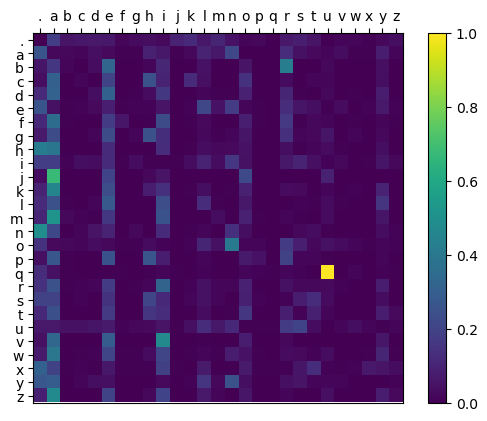

In [17]:
fig, ax = plt.subplots()

plt.imshow(F.softmax(W, dim=1).detach().numpy())

ax.xaxis.tick_top()
ax.set_xticks(range(len(itos)))
ax.set_xticklabels(list(itos.values()))

ax.set_yticks(range(len(itos)))
ax.set_yticklabels(list(itos.values()))

fig.colorbar(cm.ScalarMappable(), ax=ax)

plt.show()